# Search for Exotic Particles in Particle Accelearators

*by Vihang Narendra Bhosekar, Rakesh Battineedi and Venkata Sai Sudeep Pamulapati, December 17, 2019*

*The work presented in this notebook is done by Vihang Narendra Bhosekar*


## Introduction

### Aim of the project
This project aims to study different classification algorithms used in Machine Learning domain. For this purpose, a signal-background classification problem is considered. 

Particle Accelerators are primarily used to collide sub-atomic particles to study their nature. Generally, such collisions produce some particles which decay quickly into decay products making it difficult for the sensors to detect their presence in the collider.

The other thing that makes the problem more difficult is that the decay products formed from both the signal process (exotic particle is generated and decays) and background-process (exotic particle is not generated) are same. [5]

### Information about the dataset
Thus, to analyze their presence HEPMASS dataset was generated using Monte-Carlo simulations of the collisions producing such exotic particles. The data set is produced such that 50% of the data is from signal process and the remaining 50%of the data set is from the background process. As the mass of the particles is unknown the mass is distributed uniformly from the set {500, 750, 1000, 1250, 1500} and is fed as one of the input feature. Apart from this the original dataset has 10500000 number of instances with 28 attributes.

The class label is present in the first column. The features are present from column 2 to column 27 (22 low-level features and 5 high level features) and are already normalized.  [4]

In order to understand the relative behaviour of these algorithms, the data set was trimmed and first 500000 samples were considered for the purpose of this project. As the dataset is simulaed with uniform distribution of signal and background processes, this would not affect the results in terms of bias in training over either target.

Further, this dataset is split as 70 percent for training and 30 percent for testing purposes.

### HARDWARE:

Implemented on Tesla K80 GPU and 12 GB of RAM on Google Colab 

### Brief overview of methods:

In this report, classification is done using tree structures. Following tree based algorithms are harnessed. 

1] Decision tree Classifier:
   Decision Tree is constructed by splitting the input space, to optimize certain parameter (e.g maximize the information gain or minimize the gini impurity), across a feature sequentially until the input space partitions can be mapped into the target space partitions.    
  
2] Random Forest Classifier:
   Random Forest is constructed by constructing many decision trees froma randomly sampled data set with replacement and splitting the nodes at optimal features. The final classification is decided by drawing out a vote from all the trees. 

3] Extra-Tree Classifier:
  Extra-Tree Classifier works just like random-forest classifier except that the data is sampled without replacement in this method and the nodes are split at random instead of calculating the optimal features which reduces the computational burden.

4] XgBoost Classifier
  XgBoost Classifier implements boosting trees algorithm, wherein the trees are constructed sequentially, by considering the prediction of the previous tree, to minimize the loss of prediction.

Finally, a comparative analysis of their performance is done. 


## Methods



### Decision Trees:

Apart from the brief overview above, some of the advantages of decision trees are that they can model complex relations without a priori assumptions, can perform classification/regression on heterogeneous dataset having ordered as well as categorical dataset. Due to their ability to choose features which optimizes the split, they have some immunity to the noisy variables. They perform well even if there are outliers and labels are incorrect.  [2]

Let us consider input space $\mathscr{X}$ and the output space $\mathscr{Y} = \{c_{1},c_{2}...c_{j}\}$ .
Then learning a decision tree classifier can be thought of as learning a function $\phi$ which partitions the input space to map to the output space such that for all $x\epsilon\mathscr{X}$ $\phi(x) = c_{k}$ for $k\epsilon\{1,2,3,....j\}$ .   

This partitioning of the input space is carried out by selecting a feature which optimizes the splitting criteria. This splitting criteria could be to minimize the gini index or to maximize the information gain. 

Scikit library used here uses CART algorithm to build decision trees. CART stands for Classification and Regression Trees and it uses the gini index to measure the purity of the sample space. 

If all the samples belong to the same category then, that partition could be called as pure. The value of gini index varies between zero and one. 
Purity would require the gini index to be 0 and the maximum value of gini index in binary classification would be 0.5. If the value of gini-index is 1, then all the samples are randomly distributed across the target space.

To classify the HEPMASS dataset, the DecisionTreeClassifier is trained with maximum leaf nodes of 1000 and maximum depth of 15, which gives an AUC score of 0.84327.

Both of the above parameters are used to restrict the growth of the tree. This is usedul to stop overfitting. However, as can be seen from the training (93.23 percent) and testing (84.32 percent) accuracy the tree is still overfitting. 

## Ensemble Techniques
In general, the single decision tree overfits the training data giving a low-bias and high-variance issue. 

In order to overcome this short comming ensembles of such decision trees are used. There are three main reasons of using ensembles.

1) Statistically, if the learning set is too small, then many algorithms can fit different models giving comparable performance. If the models are uncorrelated then their average would have a lesser risk of choosing an incorrect hypothesis.

2) By harnessing different models, the ensemble performs the optimization from various starting points. This reduces the risk of getting stuck in local minima if greedy assumptions are made by the individual models.

3) Finally, the sometimes the individual models are not capable to represent the learning set as a function. This combination of several models in an ensemble can make it possible to cover the space of functions required for representation.

We will discuss three ensemble techniques below.

1) Random Forest
2) Extra Trees Classifier
3) XgBoost Classifier

All of these are implemented using sklearn library.

### Random Forest

The main problem with Decision trees is that they overfit. To solve this problem, [7] proposes a technique called random forest. This technique harnesses the decision tree algorithm to create an ensemble of such trees. This ensemble is created by considering two factors. The first one is that each tree is constructed by a method called as bagging. In bagging, each tree is construced by drawing out samples from the dataset randomly with replacement. Thus, these trees are fairly uncorrelated from one another. Thus, same sample could be used more than once to construct the same tree. The second factor considered while constructing a tree is that the splitting at a node is carried out by optimizing some parameter like gini index. Finally, after training all the trees, on the training data, the outputs of individual trees for some new data is taken into account for the final decision by a voting mechanism.This is called bootstrapped aggregating [7]

The advantage of this method is that due to the aggregating nature of the second half of the algorithm, the overfitting is reduced. 

The trees were allowed a maximum depth of 25 and maximum leaf nodes were 10000. The number of trees ensembled were 150 is denoted by n_estimators. 

The output for the random forest shows the AUC score of 0.8636.




### Extra Trees

Extra Trees is another ensemble structure constructed from multiple decision trees. The underlying idea of this ensemble is simlar to Random Trees except the following differences.

The difference between random forest and extra trees is that in the extra trees ensembles are constructed by drawing out the data at random from the dataset but without replacement. Thus each tree that is constructed in this ensemble has a data set with unique samples although two trees could end up having same data set.
Thus, the trees constructed in this ensemble are more uncorrelated than the ones in Random Forest.

Apart from that, this ensemble is called extremely randomized due to the fact that the feature that is split at a node is not selected to optimize certain parameter but at random. This randomness tends to yield better results than Random Forest if it does not induce too large a bias.

While implementing this classifier,
the number of trees constructed were 150, the maximum depth per tree permitted was 35 (ten more than the tree depth for Random Forest) and maximum number of leaf nodes allowed were 10000 (same as random forest).

This gave an AUC score of 0.85284


### XgBoost

XgBoost is a library which implements tree boosting algorithms, by taking into account the computer architecture resources available to the user. For this purpose, it implements a novel sparse aware algorithm to handle sparse data, adapts the cache access patterns, compresses the data which speeds up the computation by a factor of three and shards it into two disks which increases the speed two times.

According to [8], gradient Boosting is an effective technique against heterogeneous data like integers and strings, noisy data and complex dependencies amongst the features.  
Gradient boosting is a process of developing an ensemble predictor by performing gradient descent in a functional space. 

This gives the intuition that this can be dealt like an optimization problem. 

The prediction of a typical ensemble of trees can be written as the following equation.
 $\hat{y_{i}} = \sum_{k=1}^{K} f_{k}(x_{i})$ such that $f_{k} \epsilon \mathscr{F}$

Here, K is the number of trees, f is the function in functional space which is nothing but the tree in the sigma algebra of all nodes which is represented as $\mathscr{F}$ (set of all possible CARTS).

However, learning tree structures is much harder problem than traditional optimization problem. Thus, it is not feasible to learn all the trees at a time. In order to find a way around this problem, an additive strategy is harnessed which develops one tree at a time and adds it's prediction to the next tree at the next time step.

Thus, the prediction at time t is given by $\hat{y_{i}}^{(t)} = \sum_{k=1}^{t} f_{k}(x_{i})$ 

The basic idea behind this mechanism is that the prediction of each new tree is incorporated with the prediction of the previous tree.

Now, the next issue is to choose a tree for the next time step given the current prediction. For this purpose, the following optimization function is developed with MSE loss.

$obj^{(t)}=\sum_{i=1}^{n}(y_{i}−(\hat{y_{i}}^{(t−1)}+f_{t}(x_{i})))^{2}+\sum_{i=1}^{t}\Omega(f_{i})$

Please note, that the prediction at t-1 is added to the result of the tree at constructed at the "t" time instant.  
The MSE loss is harnessed to calculate the structure score for the next tree at a time instant and the regularization parameters is used to control the model complexity.

This method gave an AUC score of 0.8638 for a training accuracy of 88.11% with 700 trees and a learning rate of 0.2.

Along with that dart booster was utilized in this module which drops trees which are trivial generally the trees which are added later on.

Early stopping was also experimented by looking at the fact that after around 200 trees, the gap between the training and testing error increases, however, the results were almost same with training accuracy being a little lower than the current value.



## Results

Metrics used to define the outputs:

AUC Score: AUC score gives the area under the ROC curve. ROC curve determines the ability of a classifier to classify accurately and it must have a high sensitivity (true positive rate) and low  (1-specifitivity) (false positive rate).

Test Accuracy: Performance of the model on testing data set. (Percent of the testing data correctly classified).

In [0]:
#------------------------importing the required modules------------#
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
#-------------------------XG Boost--------------------------------#
import time
from xgboost import XGBClassifier
#-----------------ROC curve----------------#
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
#----------------plots-------------------#
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

In [0]:
#%cd ./sample_data
df3 = pd.read_csv("/content/train_new_data.csv")

cols = df3.columns
Y = df3[cols[1]]
X = df3[cols[2:]]



In [0]:
#-----------------------Train and test splitting------------------#
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=66)

In [0]:
#------------------Decsion tree classifier-------------------#
dt = sklearn.tree.DecisionTreeClassifier(max_leaf_nodes=7000, max_depth=15)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
dt_predict_train = dt.predict(X_train)

Train Accuracy:  0.9093828571428572
Confusion Matrix
[[155091  19733]
 [ 11983 163193]]


Test Accuraccy:  0.8432733333333333
Confusion Matrix
[[61433 13457]
 [10052 65058]]


0.8432397027911829


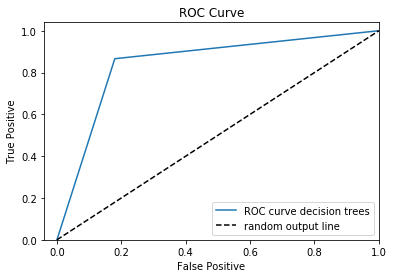

In [32]:
#------------------------Confusion matrix, ROC, AUC for Decision trees----------------#
print('Train Accuracy: ', sklearn.metrics.accuracy_score(y_train, dt_predict_train))
print("Confusion Matrix")
print(confusion_matrix(y_train, dt_predict_train))
print('\n')

print('Test Accuraccy: ', sklearn.metrics.accuracy_score(y_test, dt_predict))
print("Confusion Matrix")
print(confusion_matrix(y_test, dt_predict))
print('\n')


print(sklearn.metrics.roc_auc_score(y_test, dt_predict))


fpr_dt, tpr_dt, thresholds = roc_curve(y_test, dt_predict)


# Plots
plt.plot(fpr_dt, tpr_dt, label='ROC curve decision trees')


plt.plot([0, 1], [0, 1], 'k--', label='random output line')
_ = plt.xlabel('False Positive')
_ = plt.ylabel('True Positive')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.04, 1])
_ = plt.ylim([0, 1.04])
_ = plt.legend(loc="lower right")



In [0]:
#------------------------Random Forest Ensemble-------------------#
rfc = sklearn.ensemble.RandomForestClassifier(max_depth=25, n_estimators=150, max_leaf_nodes=10000) 


rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_predict_train = rfc.predict(X_train)


Train Accuracy:  0.9601285714285714
Confusion Matrix for training data
[[166417   8407]
 [  5548 169628]]


Test Accuraccy:  0.86364
Confusion Matrix for testing data
[[62671 12219]
 [ 8235 66875]]


0.8636007519233954


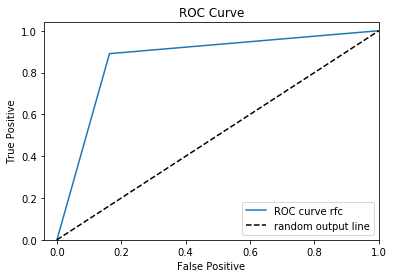

In [22]:
#------------------Confusion matrix, ROC,AUC for Random Forest--------------------#
print('Train Accuracy: ', sklearn.metrics.accuracy_score(y_train, rfc_predict_train))
print("Confusion Matrix for training data")
print(confusion_matrix(y_train, rfc_predict_train))
print('\n')
print('Test Accuraccy: ', sklearn.metrics.accuracy_score(y_test, rfc_predict))
print("Confusion Matrix for testing data")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print(sklearn.metrics.roc_auc_score(y_test, rfc_predict))

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc_predict)


# Plots
plt.plot(fpr_rfc, tpr_rfc, label='ROC curve rfc')


plt.plot([0, 1], [0, 1], 'k--', label='random output line')
_ = plt.xlabel('False Positive')
_ = plt.ylabel('True Positive')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.04, 1])
_ = plt.ylim([0, 1.04])
_ = plt.legend(loc="lower right")


In [0]:
#------------------------Extra Trees Ensemble-------------------#
et = sklearn.ensemble.ExtraTreesClassifier(max_depth=35, n_estimators=150, max_leaf_nodes=10000) 


et.fit(X_train,y_train)
et_predict = et.predict(X_test)
et_predict_train = et.predict(X_train)


Train Accuracy:  0.9238685714285715
Confusion Matrix
[[160790  14034]
 [ 12612 162564]]


Test Accuraccy:  0.85284
Confusion Matrix
[[63406 11484]
 [10590 64520]]


0.8528309420896709


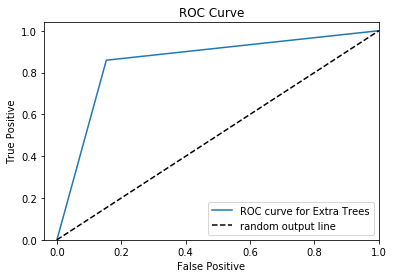

In [25]:
#------------------Confusion matrix, ROC,AUC for Extra Trees--------------------#
print('Train Accuracy: ', sklearn.metrics.accuracy_score(y_train, et_predict_train))
print("Confusion Matrix")
print(confusion_matrix(y_train, et_predict_train))
print('\n')


print('Test Accuraccy: ', sklearn.metrics.accuracy_score(y_test, et_predict))
print("Confusion Matrix")
print(confusion_matrix(y_test, et_predict))
print('\n')


print(sklearn.metrics.roc_auc_score(y_test, et_predict))


fpr_et, tpr_et, thresholds = roc_curve(y_test, et_predict)


# Plots
plt.plot(fpr_et, tpr_et, label='ROC curve for Extra Trees')

plt.plot([0, 1], [0, 1], 'k--', label='random output line')
_ = plt.xlabel('False Positive')
_ = plt.ylabel('True Positive')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.04, 1])
_ = plt.ylim([0, 1.04])
_ = plt.legend(loc="lower right")

In [0]:
#-------------------XgBoost---------------------#
model = XGBClassifier(n_estimators=700,  booster='dart', learning_rate = 0.2)

# define the eval set and metric
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]

# fit the model
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)#, early_stopping_rounds=100)

pred_test_xg = model.predict(X_test)
pred_train_xg = model.predict(X_train)


[0]	validation_0-auc:0.90123	validation_0-error:0.194318	validation_1-auc:0.901003	validation_1-error:0.194751
[1]	validation_0-auc:0.906572	validation_0-error:0.184416	validation_1-auc:0.906502	validation_1-error:0.183084
[2]	validation_0-auc:0.916395	validation_0-error:0.180804	validation_1-auc:0.916655	validation_1-error:0.179455
[3]	validation_0-auc:0.918527	validation_0-error:0.182841	validation_1-auc:0.918558	validation_1-error:0.18116
[4]	validation_0-auc:0.921012	validation_0-error:0.175339	validation_1-auc:0.921177	validation_1-error:0.174046
[5]	validation_0-auc:0.923696	validation_0-error:0.173657	validation_1-auc:0.923751	validation_1-error:0.172275
[6]	validation_0-auc:0.924988	validation_0-error:0.171416	validation_1-auc:0.924915	validation_1-error:0.170056
[7]	validation_0-auc:0.925413	validation_0-error:0.170629	validation_1-auc:0.925342	validation_1-error:0.169132
[8]	validation_0-auc:0.927349	validation_0-error:0.16711	validation_1-auc:0.927173	validation_1-error:0.16

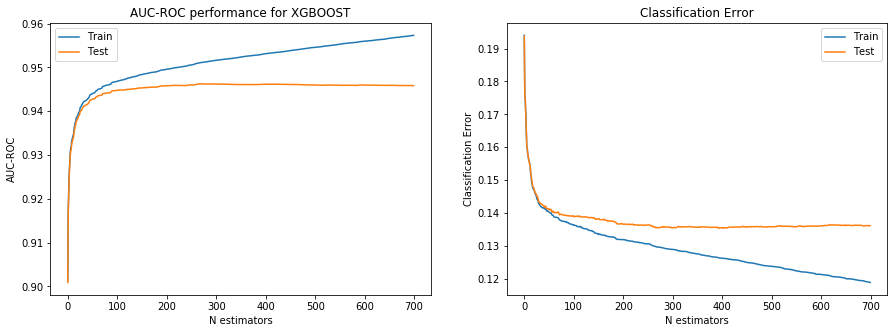

Train Accuracy:  0.8811085714285715
Confusion Matrix for training data
[[150078  24746]
 [ 16866 158310]]


Test Accuraccy:  0.86386
Confusion Matrix for testing data
[[63048 11842]
 [ 8579 66531]]


0.8638278021895833


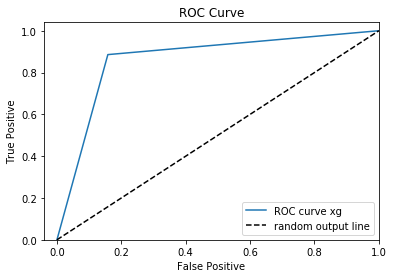

In [11]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
# plot auc
ax[0].plot(x_axis, results['validation_0']['auc'], label='Train')
ax[0].plot(x_axis, results['validation_1']['auc'], label='Test')
ax[0].legend()
ax[0].set_title('AUC-ROC performance for XGBOOST')
ax[0].set_ylabel('AUC-ROC')
ax[0].set_xlabel('N estimators')
# plot classification error
ax[1].plot(x_axis, results['validation_0']['error'], label='Train')
ax[1].plot(x_axis, results['validation_1']['error'], label='Test')
ax[1].legend()
ax[1].set_title('Classification Error')
ax[1].set_ylabel('Classification Error')
ax[1].set_xlabel('N estimators')
plt.show()
plt.tight_layout()

print('Train Accuracy: ', sklearn.metrics.accuracy_score(y_train, pred_train_xg))
print("Confusion Matrix for training data")
print(confusion_matrix(y_train, pred_train_xg))
print('\n')
#print("Classification Report")
#print(classification_report(y_train, rfc_predict_train))
#print('\n')

print('Test Accuraccy: ', sklearn.metrics.accuracy_score(y_test, pred_test_xg))
print("Confusion Matrix for testing data")
print(confusion_matrix(y_test, pred_test_xg))
print('\n')
#print("Classification Report")
#print(classification_report(y_test, rfc_predict))
#print('\n')

print(sklearn.metrics.roc_auc_score(y_test, pred_test_xg))


fpr_xg, tpr_xg, thresholds = roc_curve(y_test, pred_test_xg)


# create plot
plt.plot(fpr_xg, tpr_xg, label = 'ROC curve xg')

plt.plot([0, 1], [0, 1], 'k--', label='random output line')
_ = plt.xlabel('False Positive')
_ = plt.ylabel('True Positive')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.04, 1])
_ = plt.ylim([0, 1.04])
_ = plt.legend(loc="lower right")

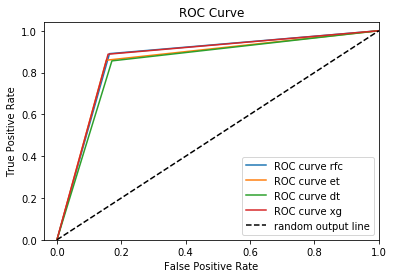

In [26]:

#--------------------Comparative Analysis of all the algorithms----------------#

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc_predict)
fpr_et, tpr_et, thresholds = roc_curve(y_test, et_predict)
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, dt_predict)
fpr_xg, tpr_xg, thresholds = roc_curve(y_test, pred_test_xg)

# create plot
plt.plot(fpr_rfc, tpr_rfc, label='ROC curve rfc')
plt.plot(fpr_et, tpr_et, label='ROC curve et')
plt.plot(fpr_dt, tpr_dt, label='ROC curve dt')
plt.plot(fpr_xg, tpr_xg, label = 'ROC curve xg')

plt.plot([0, 1], [0, 1], 'k--', label='random output line')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.04, 1])
_ = plt.ylim([0, 1.04])
_ = plt.legend(loc="lower right")

rfc is Random Forest

et is Extra Trees

dt is Decision Trees

xg is XgBoost

## Conclusions

It can be seen that the AUC score for Decision trees was around 0.8432 for a training accuracy of 0.90938.

The AUC score for Random Forest was around 0.86 for a training accuracy of 0.9601.

The AUC score for the Extra Trees algorithm was 0.852830 for a training accuracy of 0.9238

The Xgboost classifier had an AUC score of 0.86382 for a training accuracy of 0.8811.

From the last plot which shows the ROC curves of all the algorithms it can be seen that Xgboost performs better than others.

Although, random forest and xgBoost have a comparable performance, the training accuracy of Random frest indicates that the model is overfitting. Due to the inherent nature of Xgboost, it resists overfitting harnessing the regularization parameter and dart booster (drop-out mechanism for trees).

Thus, this project gives an exposure to Tree Structures and its Ensembles for the purposes of Classification. 



### References

[1] https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101

[2] https://arxiv.org/pdf/1407.7502

[3] https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

[4] https://archive.ics.uci.edu/ml/datasets/HEPMASS

[5] Pierre Baldi, Kyle Cranmer, Taylor Faucett, Peter Sadowski, and Daniel Whiteson. 'Parameterized Machine Learning for High-Energy Physics.'

[6] http://dni-institute.in/blogs/cart-decision-tree-gini-index-explained/

[7] Breiman, L. Random Forests. Machine Learning 45, 5–32 (2001) doi:10.1023/A:1010933404324

[8] arXiv:1706.09516

[9] https://medium.com/acing-ai/what-is-auc-446a71810df9

[10] https://xgboost.readthedocs.io/en/latest/tutorials/dart.html

[11] https://towardsdatascience.com/understanding-random-forest-58381e0602d2

[12]https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

[13] https://towardsdatascience.com/random-forests-for-complete-beginners-74a8a54a3896

[14] https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7


[15] Code inspired from : https://towardsdatascience.com/ 

[16] https://scikit-learn.org/stable/

In [10]:
import io
from nbformat import current
import glob
nbfile = glob.glob('Bhosekar-Project.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Bhosekar-Project.ipynb is 2039


In [5]:
%cd ./drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
